In [369]:
import matplotlib.pyplot as plt
import numpy as np
import flet as ft
import io
import base64
from pylsl import StreamInlet, resolve_stream
from scipy.signal import welch, spectrogram
import pyxdf

In [370]:
from scipy.signal import butter, lfilter, welch, filtfilt, iirnotch
import datetime
# Create a function to design a filter (function output b, a = filter coefficients)
def butter_bandpass(lowcut, highcut, fs, order):
    nyq = 0.5 * fs # define nyquist frequency
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandstop(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='bandstop')
    
    return b, a
# Create a function to re-reference data to CAR
def common_average_reference(data):
    common_average = np.mean(data, axis=0) # For each channel we calculate the average across time points
    data_car = data - common_average
    return data_car


In [591]:
# streams, header = pyxdf.load_xdf('../../../data_ssvep/Toey/flicker/6Hz/6Hz_8')
# streams, header = pyxdf.load_xdf('../../../data_ssvep/Toey/SSVEP_data/6Hz/6hz_3')
streams, header = pyxdf.load_xdf('../../../data_ssvep/Toey/flicker1/6Hz/6Hz_02')
raw_data = streams[0]["time_series"].T #From Steam variable this query is EEG data

In [592]:
raw_data.shape

(8, 21660)

In [626]:
data = raw_data[0:4,19000:25000]
# data = raw_data
data.shape

(4, 2660)

In [627]:
# data = common_average_reference(data)

In [628]:
fs = 250
lowcut = 2
highcut = 50
order = 1
b, a = butter_bandpass(lowcut, highcut, fs, order)
filtered_data = filtfilt(b,a, data)
print(filtered_data.shape)
# fs = 250 
# f0 = 31   
# Q = 30    
# b, a = iirnotch(f0, Q, fs)
# filtered_data = filtfilt(b, a, filtered_data)
# fs = 250 
lowcut = 30 
highcut = 33  
order = 8
s = datetime.datetime.now()
b, a = butter_bandstop(lowcut, highcut, fs, order)
filtered_data = filtfilt(b, a, filtered_data)
# r = datetime.datetime.now() - s
# print(r)
# filtered_data = data[:,1000:2000]
filtered_data.shape

(4, 2660)


(4, 2660)

In [629]:

filtered_data.shape

(4, 2660)

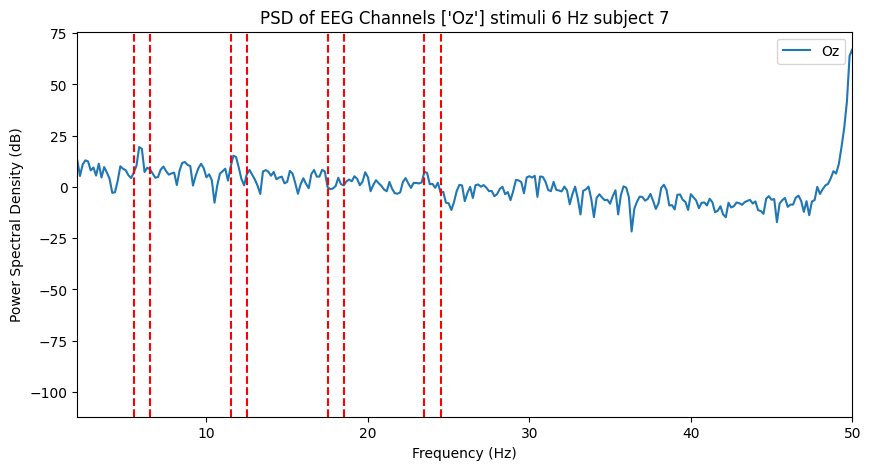

In [636]:
selected_channels = ['Oz']  # เลือกช่องที่ต้องการพล็อต
channels = ['Oz', 'Pz', 'O2', 'O1', '-', '-', '-', '-']
sfr = 6
subject = 7
                
plt.figure(figsize=(10, 5))  # สร้างกราฟเพียงครั้งเดียว
for selected_channel in selected_channels:
    channel_index = channels.index(selected_channel)
    # f, Pxx = welch(filtered_data[channel_index] - filtered_data[1], fs=250, nperseg=len(data[channel_index]))
    
    f, Pxx = welch(filtered_data[channel_index], fs=250, nperseg= 250*6)
    # noverlap = nperseg//2
    psds_mean = np.mean(Pxx)

    plt.plot(f, 10 * np.log10(Pxx), label=f'{selected_channel}')  # เพิ่ม label ให้แต่ละช่อง

    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (dB)')
    plt.title(f'PSD of EEG Channels {selected_channels} stimuli {sfr} Hz subject {subject}')
    plt.axvline(x=5.5, color='r', linestyle='--') 
    plt.axvline(x=6.5, color='r', linestyle='--') 
    plt.axvline(x=11.5, color='r', linestyle='--') 
    plt.axvline(x=12.5, color='r', linestyle='--') 
    plt.axvline(x=17.5, color='r', linestyle='--') 
    plt.axvline(x=18.5, color='r', linestyle='--') 
    plt.axvline(x=23.5, color='r', linestyle='--') 
    plt.axvline(x=24.5, color='r', linestyle='--') 
    # plt.axvline(x=19.5, color='r', linestyle='--') 
    # plt.axvline(x=20.5, color='r', linestyle='--') 
    # plt.axvline(x=39.5, color='r', linestyle='--') 
    # plt.axvline(x=40.5, color='r', linestyle='--')
    plt.legend()
    plt.xlim([2, 50])
    plt.legend()

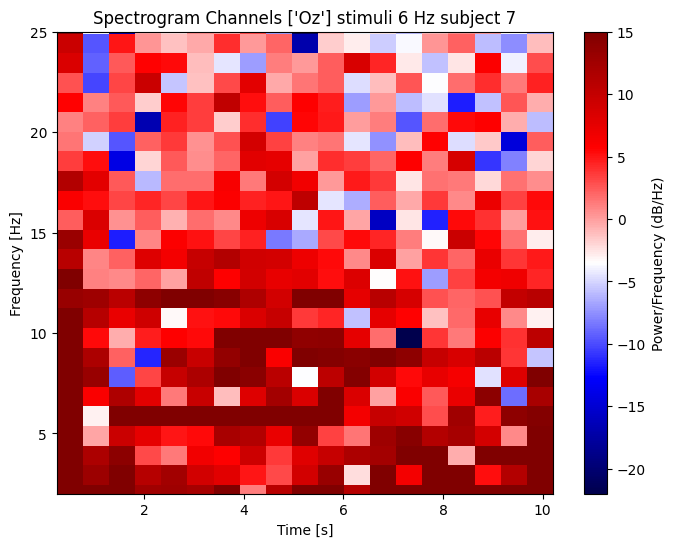

In [637]:
f, t, Sxx = spectrogram(filtered_data[channel_index] - filtered_data[1], fs=fs, noverlap=fs//2)

# มาสก์ค่าใน Sxx ที่ต่ำกว่า 10
Sxx_masked = np.ma.masked_less(10 * np.log10(Sxx), 10)

# พล็อต Spectrogram
plt.figure(figsize=(8, 6))
# plt.ylim([2, 45])  # กำหนดช่วงความถี่
plt.ylim([2, 25])
plt.pcolormesh(t, f, 10 * np.log10(Sxx), cmap='seismic')  # พล็อต Spectrogram
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.title(f'Spectrogram Channels {selected_channels} stimuli {sfr} Hz subject {subject}')
# plt.clim([10, -60])  # กำหนดช่วงสี
plt.clim([15, -20]) 
plt.show()

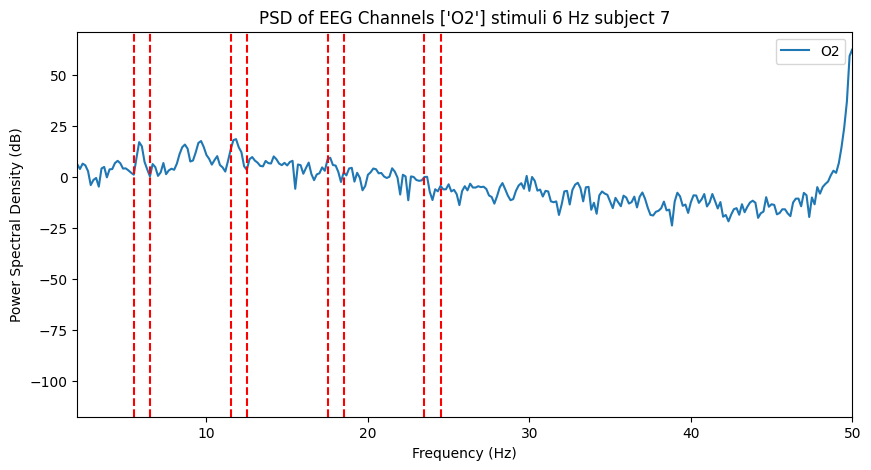

In [638]:
selected_channels = ['O2']  # เลือกช่องที่ต้องการพล็อต
channels = ['Oz', 'Pz', 'O2', 'O1']

                
plt.figure(figsize=(10, 5))  # สร้างกราฟเพียงครั้งเดียว
for selected_channel in selected_channels:
    channel_index = channels.index(selected_channel)
    # f, Pxx = welch(filtered_data[channel_index] - filtered_data[1], fs=250, nperseg=len(data[channel_index]))
    f, Pxx = welch(filtered_data[channel_index] - filtered_data[1], fs=250, nperseg=250*6)

    psds_mean = np.mean(Pxx)

    plt.plot(f, 10 * np.log10(Pxx), label=f'{selected_channel}')  # เพิ่ม label ให้แต่ละช่อง

    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (dB)')
    plt.title(f'PSD of EEG Channels {selected_channels} stimuli {sfr} Hz subject {subject}')
    plt.axvline(x=5.5, color='r', linestyle='--') 
    plt.axvline(x=6.5, color='r', linestyle='--') 
    plt.axvline(x=11.5, color='r', linestyle='--') 
    plt.axvline(x=12.5, color='r', linestyle='--') 
    plt.axvline(x=17.5, color='r', linestyle='--') 
    plt.axvline(x=18.5, color='r', linestyle='--') 
    plt.axvline(x=23.5, color='r', linestyle='--') 
    plt.axvline(x=24.5, color='r', linestyle='--') 
    # plt.axvline(x=19.5, color='r', linestyle='--') 
    # plt.axvline(x=20.5, color='r', linestyle='--') 
    # plt.axvline(x=39.5, color='r', linestyle='--') 
    # plt.axvline(x=40.5, color='r', linestyle='--')    
    plt.legend()
    plt.xlim([2, 50])
    plt.legend()

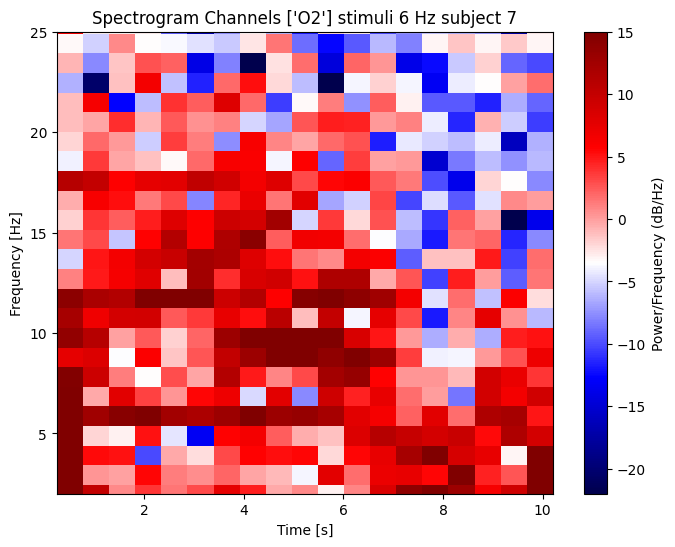

In [639]:
f, t, Sxx = spectrogram(filtered_data[channel_index] - filtered_data[1], fs=fs, noverlap=fs//2)

# มาสก์ค่าใน Sxx ที่ต่ำกว่า 10
Sxx_masked = np.ma.masked_less(10 * np.log10(Sxx), 10)

# พล็อต Spectrogram
plt.figure(figsize=(8, 6))
plt.ylim([2, 25])  # กำหนดช่วงความถี่
# plt.ylim([2, 45])  # กำหนดช่วงความถี่
plt.pcolormesh(t, f, 10 * np.log10(Sxx), cmap='seismic')  # พล็อต Spectrogram
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.title(f'Spectrogram Channels {selected_channels} stimuli {sfr} Hz subject {subject}')
plt.clim([15, -20])  # กำหนดช่วงสี
# plt.clim([10, -60])  # กำหนดช่วงสี
plt.show()

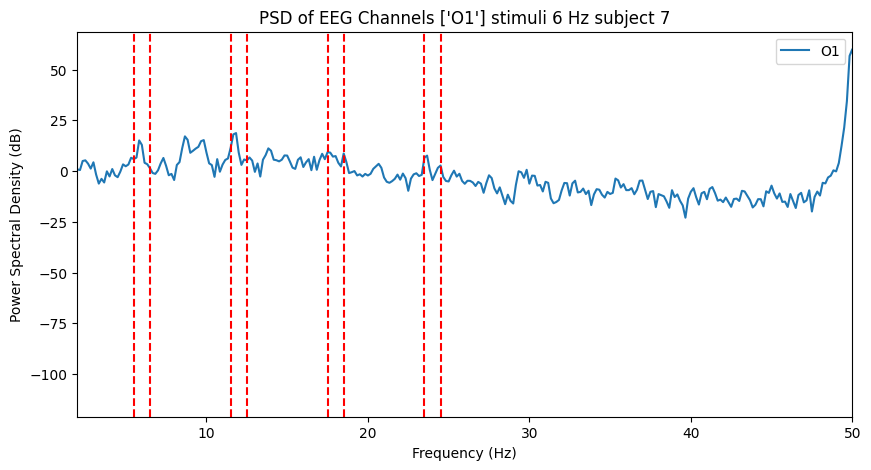

In [640]:
selected_channels = ['O1']  # เลือกช่องที่ต้องการพล็อต
channels = ['Oz', 'Pz', 'O2', 'O1']

                
plt.figure(figsize=(10, 5))  # สร้างกราฟเพียงครั้งเดียว
for selected_channel in selected_channels:
    channel_index = channels.index(selected_channel)
    # f, Pxx = welch(filtered_data[channel_index] - filtered_data[1], fs=250, nperseg=len(data[channel_index]))
    f, Pxx = welch(filtered_data[channel_index] - filtered_data[1], fs=250, nperseg=250*6)
    psds_mean = np.mean(Pxx)

    plt.plot(f, 10 * np.log10(Pxx), label=f'{selected_channel}')  # เพิ่ม label ให้แต่ละช่อง

    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (dB)')
    plt.title(f'PSD of EEG Channels {selected_channels} stimuli {sfr} Hz subject {subject}')
    plt.axvline(x=5.5, color='r', linestyle='--') 
    plt.axvline(x=6.5, color='r', linestyle='--') 
    plt.axvline(x=11.5, color='r', linestyle='--') 
    plt.axvline(x=12.5, color='r', linestyle='--') 
    plt.axvline(x=17.5, color='r', linestyle='--') 
    plt.axvline(x=18.5, color='r', linestyle='--') 
    plt.axvline(x=23.5, color='r', linestyle='--') 
    plt.axvline(x=24.5, color='r', linestyle='--') 
    # plt.axvline(x=19.5, color='r', linestyle='--') 
    # plt.axvline(x=20.5, color='r', linestyle='--') 
    # plt.axvline(x=39.5, color='r', linestyle='--') 
    # plt.axvline(x=40.5, color='r', linestyle='--')
    plt.legend()
    plt.xlim([2, 50])
    plt.legend()

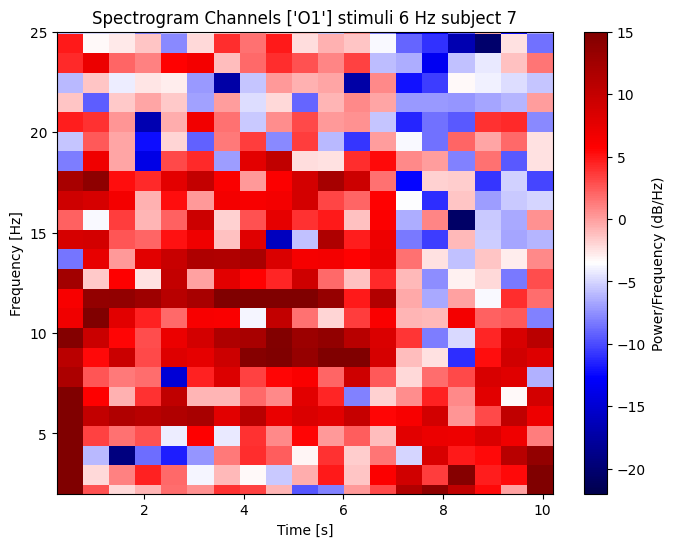

In [641]:
f, t, Sxx = spectrogram(filtered_data[channel_index] - filtered_data[1], fs=fs, noverlap=fs//2)

# มาสก์ค่าใน Sxx ที่ต่ำกว่า 10
Sxx_masked = np.ma.masked_less(10 * np.log10(Sxx), 10)

# พล็อต Spectrogram
plt.figure(figsize=(8, 6))
plt.ylim([2, 25])  # กำหนดช่วงความถี่
# plt.ylim([2, 45])  # กำหนดช่วงความถี่
plt.pcolormesh(t, f, 10 * np.log10(Sxx), cmap='seismic')  # พล็อต Spectrogram
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.title(f'Spectrogram Channels {selected_channels} stimuli {sfr} Hz subject {subject}')
plt.clim([15, -20])  # กำหนดช่วงสี
# plt.clim([10, -60])  # กำหนดช่วงสี
plt.show()

In [625]:
# f, t, Sxx = spectrogram(filtered_data[channel_index] - filtered_data[1], fs=fs, noverlap=fs//2)

# # มาสก์ค่าใน Sxx ที่ต่ำกว่า 10
# Sxx_masked = np.ma.masked_less(10 * np.log10(Sxx), 10)

# # พล็อต Spectrogram
# plt.figure(figsize=(8, 6))
# plt.ylim([2, 50])  # กำหนดช่วงความถี่
# plt.pcolormesh(t, f, 10 * np.log10(Sxx), cmap='seismic')  # พล็อต Spectrogram
# plt.xlabel('Time [s]')
# plt.ylabel('Frequency [Hz]')
# plt.colorbar(label='Power/Frequency (dB/Hz)')
# plt.title('Spectrogram')
# plt.clim([10, -40])  # กำหนดช่วงสี
# plt.show()

In [496]:
# # มาสก์ค่าใน Sxx ที่ต่ำกว่า 10
# Sxx_masked = np.ma.masked_less(10 * np.log10(Sxx), -60)

# # พล็อต Spectrogram
# plt.figure(figsize=(8, 6))
# plt.ylim([2, 40])  # กำหนดช่วงความถี่
# plt.pcolormesh(t, f, Sxx_masked, cmap='seismic')  # พล็อต Spectrogram
# plt.xlabel('Time [s]')
# plt.ylabel('Frequency [Hz]')
# plt.colorbar(label='Power/Frequency (dB/Hz)')
# plt.title('Spectrogram with values below 10 masked')
# plt.clim([10, -40])  # กำหนดช่วงสี
# plt.show()